<a href="https://www.kaggle.com/code/sanjay7013/stroke-prediction-dataset-easy-to-understand?scriptVersionId=95366704" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stroke Prediction Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Importing Libraries and Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Count plot for gender

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

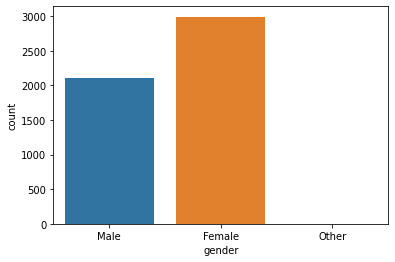

In [6]:
sns.countplot(df['gender'])

### Count plot for stroke 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

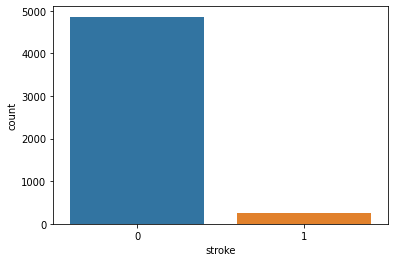

In [7]:
sns.countplot(df['stroke'])

### Number of people of each gender had stoke

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

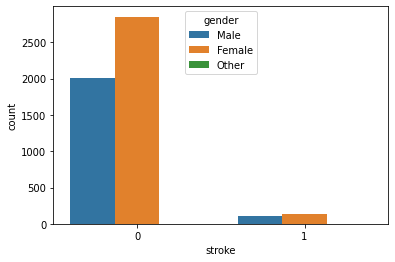

In [8]:
sns.countplot(df['stroke'], hue=df['gender'])

### Number of people having stroke who got married

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

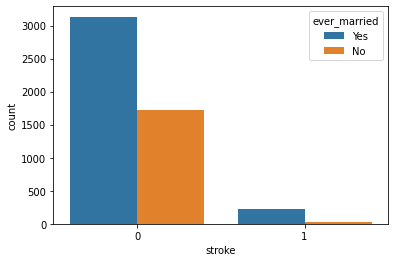

In [9]:
sns.countplot(df['stroke'], hue=df['ever_married'])

### Number of people in each age category

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

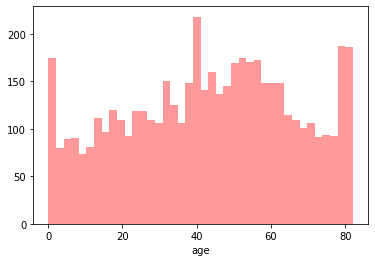

In [10]:
sns.distplot(df['age'], kde=False, color='red', bins=40)

### Number of people who had both heart disease and stroke

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

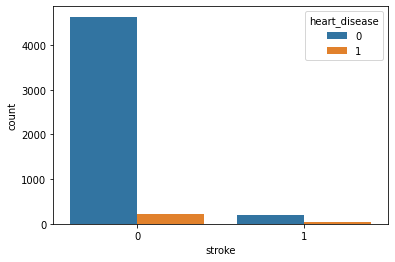

In [11]:
sns.countplot(df['stroke'], hue=df['heart_disease'])

### People's smoking status and whether they got stroke or not

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

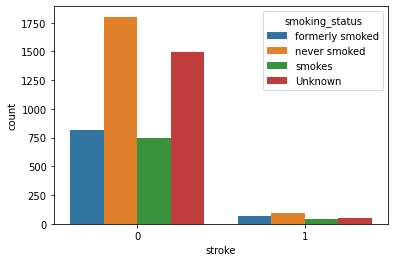

In [12]:
sns.countplot(df['stroke'], hue=df['smoking_status'])

### Correlation between variables

<AxesSubplot:>

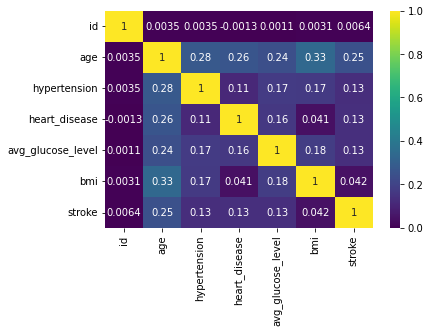

In [13]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

# Feature Engineering

### Finding null Values in each column

In [14]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

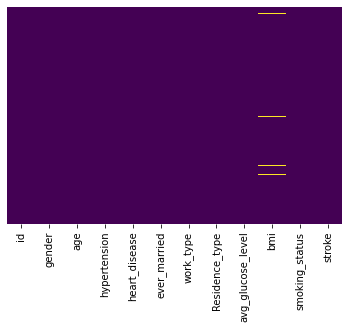

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Dropping unwanted columns

In [17]:
df.drop('id', axis = 1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Handling Gender column

In [18]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
def change(col):
    if col == 'Male':
        return 0
    elif col =='Female':
        return 1
    else:
        return 2

df['gender'] = df['gender'].apply(change)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Handling ever_married column

In [20]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df['ever_married'] = pd.get_dummies(df['ever_married'], drop_first=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


### Handling work_type column

In [22]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [23]:
def alter(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4

df['work_type'] = df['work_type'].apply(alter)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,Rural,174.12,24.0,never smoked,1


### Handling Residence_type column

In [24]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [25]:
df['Residence_type'] = pd.get_dummies(df['Residence_type'], drop_first=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,0,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,0,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,1,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,0,174.12,24.0,never smoked,1


### Handling smoking_status column

In [26]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [27]:
def change1(col):
    if col == 'formerly smoked':
        return 0
    elif col == 'never smoked':
        return 1
    elif col == 'smokes':
        return 2
    else:
        return 3

df['smoking_status'] = df['smoking_status'].apply(change1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,NaN,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


### Handling the null values in bmi column

In [28]:
df['bmi'].dtype

dtype('float64')

In [29]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             1          0   
1          1  61.0             0              0             1          1   
2          0  80.0             0              1             1          0   
3          1  49.0             0              0             1          0   
4          1  79.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
5105       1  80.0             1              0             1          0   
5106       1  81.0             0              0             1          1   
5107       1  35.0             0              0             1          1   
5108       0  51.0             0              0             1          0   
5109       1  44.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_

In [30]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,28.1,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


In [31]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Training Model

In [32]:
X = df.iloc[:,:-1].values
print(X)

[[  0.    67.     0.   ... 228.69  36.6    0.  ]
 [  1.    61.     0.   ... 202.21  28.1    1.  ]
 [  0.    80.     0.   ... 105.92  32.5    1.  ]
 ...
 [  1.    35.     0.   ...  82.99  30.6    1.  ]
 [  0.    51.     0.   ... 166.29  25.6    0.  ]
 [  1.    44.     0.   ...  85.28  26.2    3.  ]]


In [33]:
y = df.iloc[:,-1].values
print(y)

[1 1 1 ... 0 0 0]


### Splitting into Training and Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Training Model using SVM

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

### Making confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[962   0]
 [ 60   0]]


0.9412915851272016

### Applying K-Fold Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier , X=X_train , y=y_train , cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 95.38 %
Standard deviation: 0.07 %


### RandomSearch CV (Hyperparameter Tuning)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'kernel': ['rbf', 'sigmoid'],
          'degree': np.linspace(2, 5, 4),
          'C': np.logspace(-3, 5, 17),
          'gamma': np.logspace(-3, 5, 17)}
grid = RandomizedSearchCV(classifier, param_grid,cv=10, random_state = 0)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(random_state=0),
                   param_distributions={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'degree': array([2., 3., 4., 5.]),
                                        'gamma': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=0)

In [40]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'sigmoid', 'gamma': 0.01, 'degree': 2.0, 'C': 0.01}
SVC(C=0.01, degree=2.0, gamma=0.01, kernel='sigmoid', random_state=0)


### Training Model After Tuning

In [41]:
from sklearn.svm import SVC
classifier = SVC(C=0.01, degree=2.0, gamma=0.01, kernel='sigmoid', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=0.01, degree=2.0, gamma=0.01, kernel='sigmoid', random_state=0)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[962   0]
 [ 60   0]]


0.9412915851272016

### Our Final Model accuracy is 94.129%

## If u like My Notebook, Please Upvote it.